## Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

## About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
*  Sales -- Unit sales (in thousands) at each location
*  Competitor Price -- Price charged by competitor at each location
*  Income -- Community income level (in thousands of dollars)
*  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
*  Population -- Population size in region (in thousands)
*  Price -- Price company charges for car seats at each site
*  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
*  Age -- Average age of the local population
*  Education -- Education level at each location
*  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
*  US -- A factor with levels No and Yes to indicate whether the store is in the US or not


# 1. Import Necessary Libraries

In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 2.Import Data

In [5]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 3.Data understanding

In [6]:
df.shape

(400, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
#Average Sales
df['Sales'].mean()

7.496325

In [9]:
#Applying Label encoding for catogorical data
label_encoder=preprocessing.LabelEncoder()
df['ShelveLoc']=label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['US']=label_encoder.fit_transform(df['US'])

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


>>As a cloth manufacturing company is interested to know about the segment or attributes causes high sale,so trying to divide the high sales and low sales

In [12]:
sales_val = []
for value in df["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
df["sales_val"]= sales_val

In [13]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


### Splitting the data into training and testing parts

In [14]:
x=df.iloc[:,1:-1]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [15]:
y=df['sales_val']
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
#80% for training data
x_train.shape ,y_train.shape

((320, 10), (320,))

In [18]:
#20% for testing data
x_test.shape ,y_test.shape

((80, 10), (80,))

## Building Decision tree classifier using 'Entropy' as criterion

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model1=DecisionTreeClassifier( criterion='entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
from sklearn import tree

Text(0.5, 1.0, '**Decision tree using Entropy**')

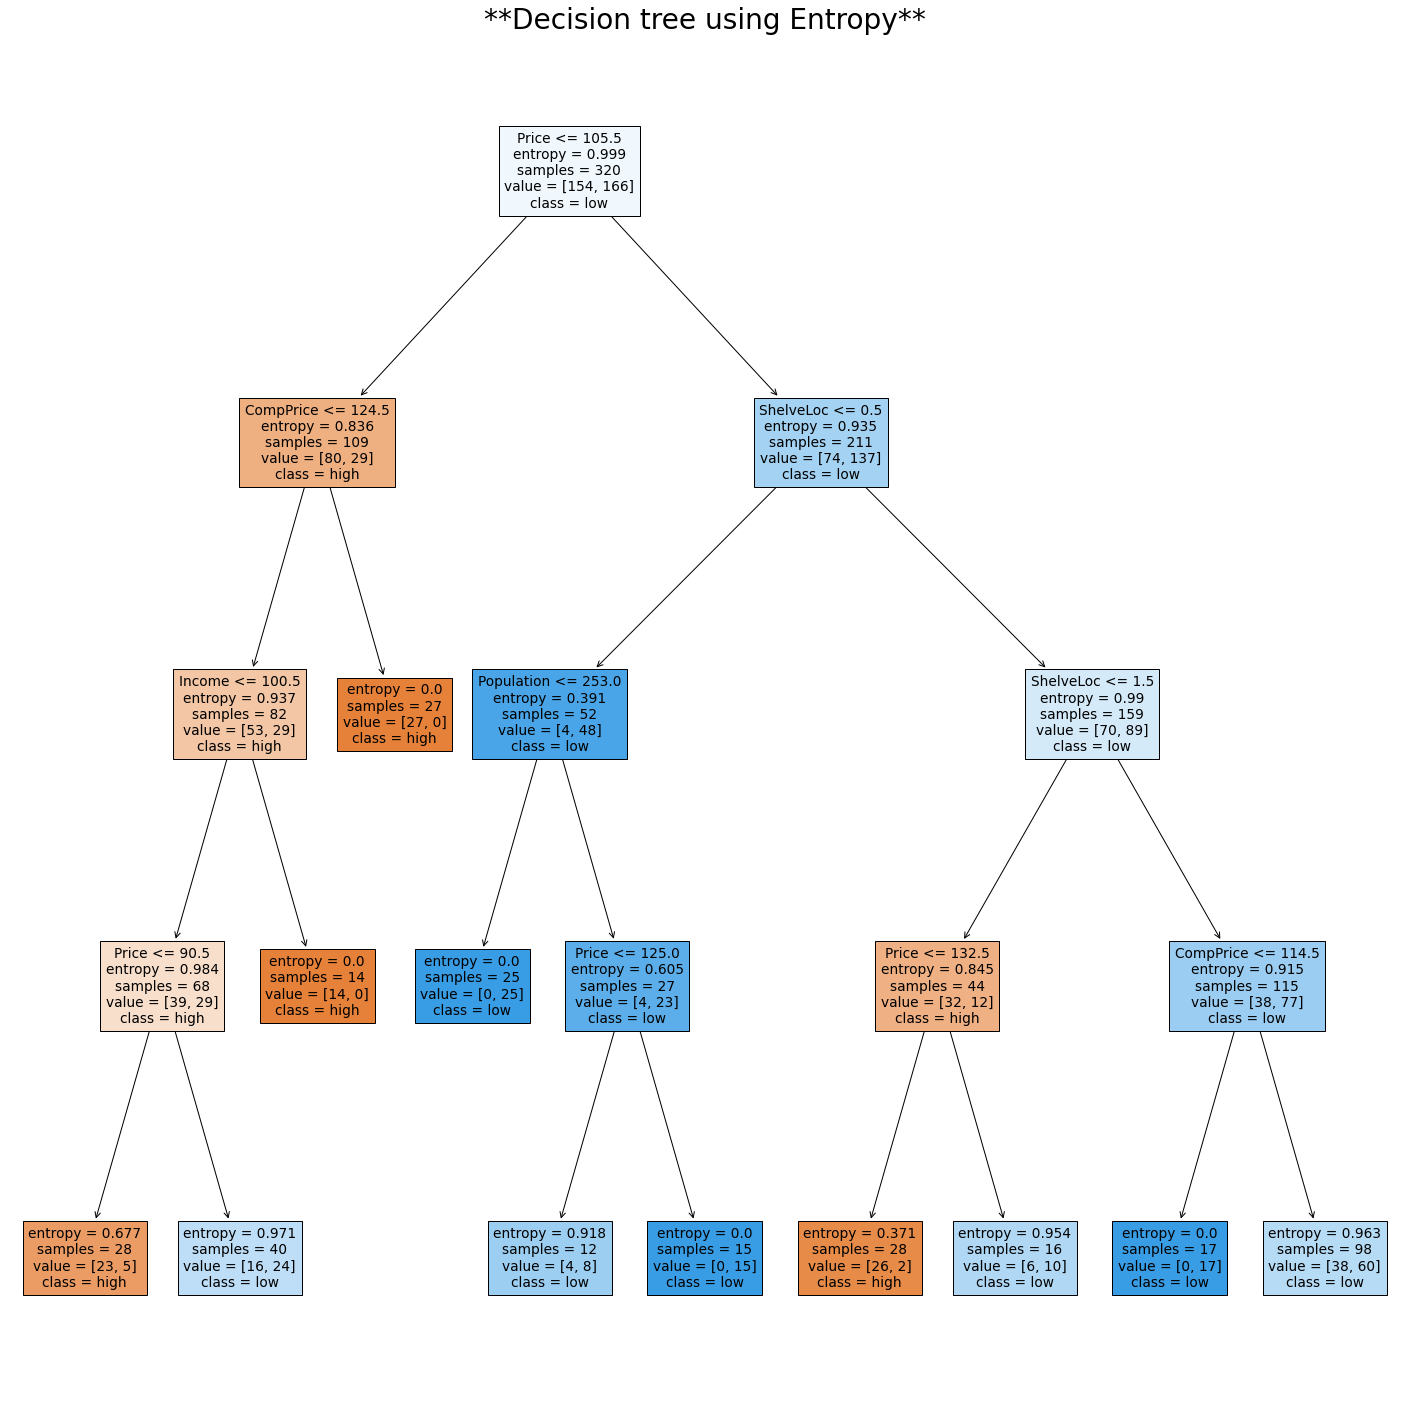

In [22]:
plt.figure(figsize=(25,25))
tree.plot_tree(model1,
               feature_names = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'],
               class_names=['high','low'],
               filled = True);
plt.title('**Decision tree using Entropy**',size=28)

In [23]:
y_pred_train=model1.predict(x_train)
y_pred_test=model1.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_train,y_pred_train)

0.778125

In [26]:
accuracy_score(y_test,y_pred_test)

0.7375

## Building a Decision Tree classifier(CART) using 'gini' as a criterion

In [27]:
model2=DecisionTreeClassifier( criterion='gini',max_depth=4)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

Text(0.5, 1.0, '**Decision tree using gini**')

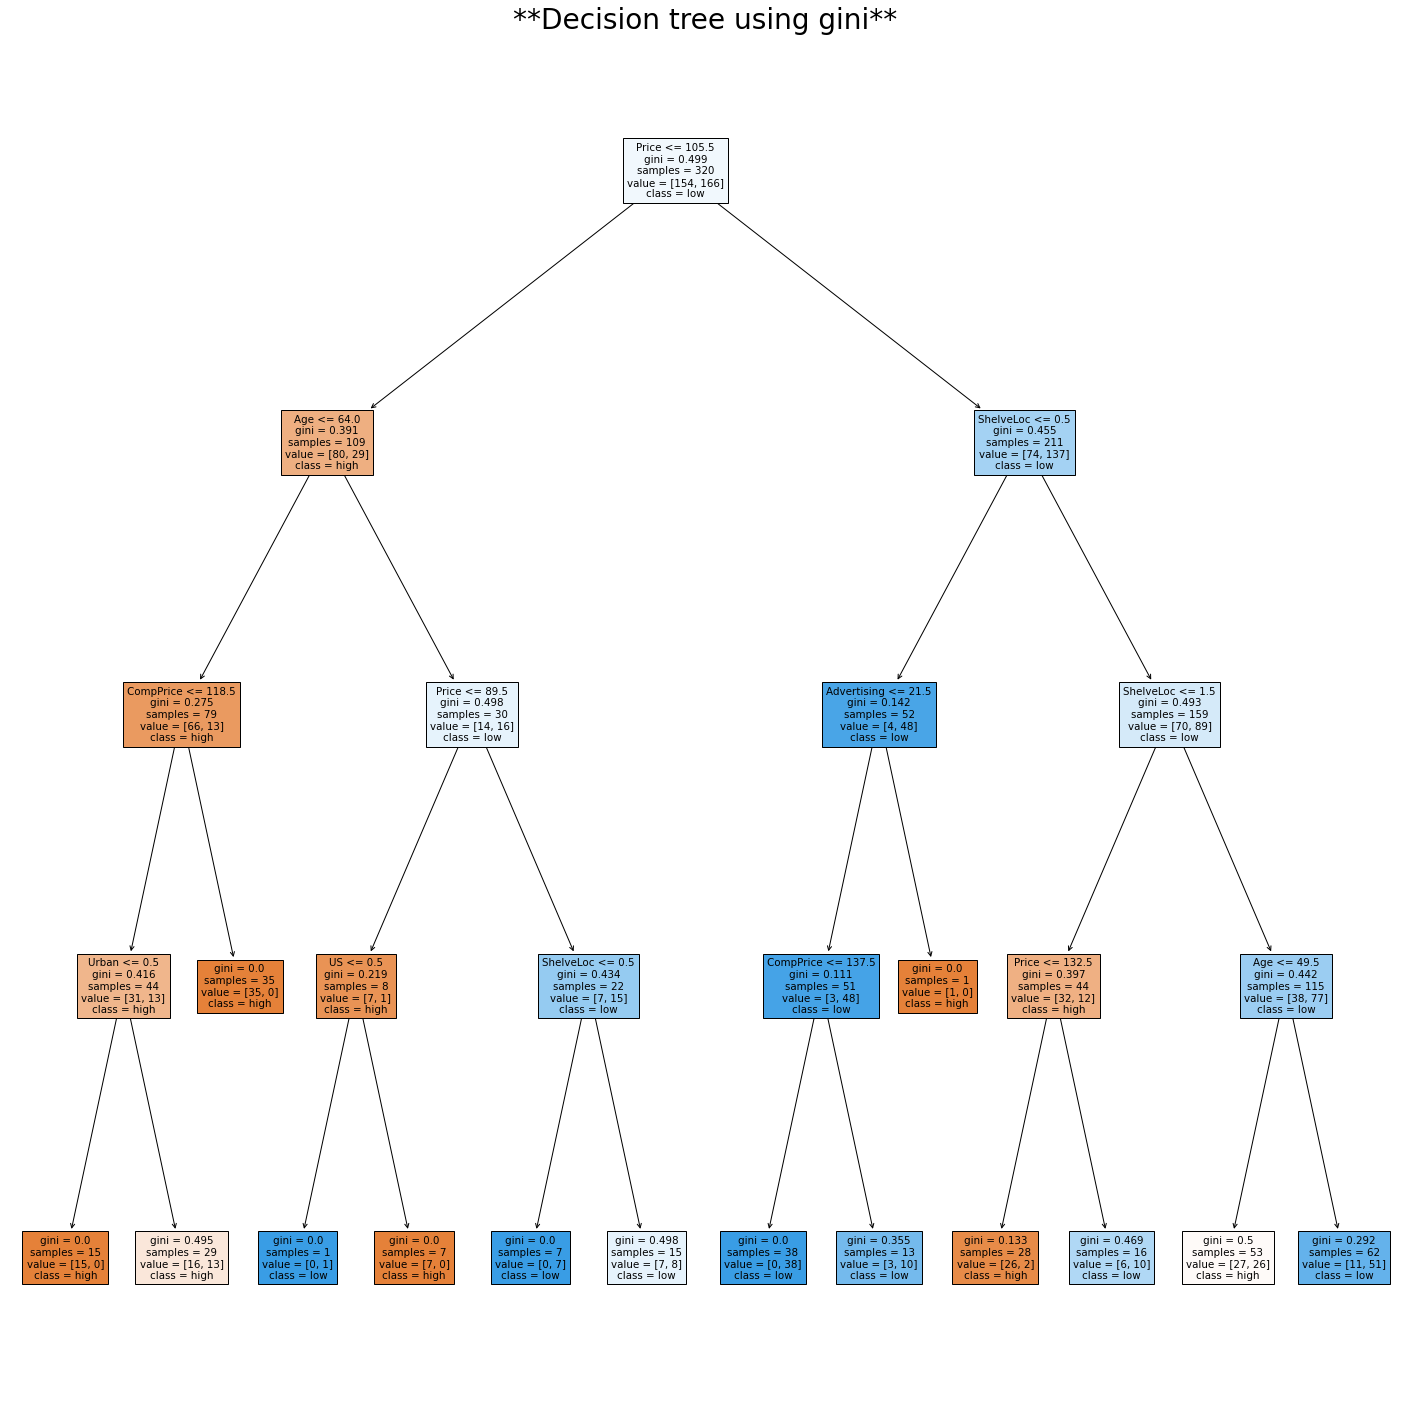

In [28]:
plt.figure(figsize=(25,25))
tree.plot_tree(model2,
               feature_names = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'],
               class_names=['high','low'],
               filled = True);
plt.title('**Decision tree using gini**',size=28)

In [29]:
y_predict_train=model1.predict(x_train)
y_predict_test=model1.predict(x_test)

In [30]:
accuracy_score(y_train,y_predict_train)

0.778125

In [31]:
accuracy_score(y_test,y_predict_test)

0.7375

## Inference:
   >From both criterions the training accuracy is more than testing accuracy

In [39]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

x,y

num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7825


### Inference:
   >Test accuracy has increased when compared to the previous model, And Income, Advertising, Age are the attributes causes high sale 

# THE END!